
# Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import datetime
import calendar
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Load data https://www.kaggle.com/gauthamp10/google-playstore-apps
# Released at dec 2020

In [3]:
g_playstore = pd.read_csv('Google-Playstore.csv')

In [4]:
#first 10 rows

In [5]:
g_playstore.head(10)

App Name  \
0                             HTTrack Website Copier   
1                      World War 2: Offline Strategy   
2                                             WPSApp   
3  OfficeSuite - Office, PDF, Word, Excel, PowerP...   
4                                   Loud Player Free   
5                                           eCharge+   
6  Jobonji: hire local pros handyman for odd jobs...   
7                          Little Panda’s Dream Town   
8                            Baby Panda: Dental Care   
9                                       Excel Reader   

                         App Id           Category  Rating  Rating Count  \
0           com.httrack.android      Communication     3.6        2848.0   
1               com.skizze.wwii           Strategy     4.3       17297.0   
2         com.themausoft.wpsapp              Tools     4.2      488639.0   
3        com.mobisystems.office           Business     4.2     1224420.0   
4      com.arthelion.loudplayer      Music & Audio     4.2         665.0   
5            com.innogy.echarge  Maps & Navigation     3.5         377.0   
6              com.pack.jobonji          Lifestyle     4.4        3346.0   
7    com.sinyee.babybus.village        Educational     4.0       44700.0   
8  com.sinyee.babybus.dentistII        Educational     4.1       10990.0   
9          com.xcelfilereaderMS              Tools     3.3        1141.0   

       Installs  Minimum Installs  Maximum Installs  Free  Price  ...  \
0      100,000+          100000.0            351560  True    0.0  ...   
1    1,000,000+         1000000.0           2161778  True    0.0  ...   
2   50,000,000+        50000000.0          79304739  True    0.0  ...   
3  100,000,000+       100000000.0         163660067  True    0.0  ...   
4       50,000+           50000.0             73463  True    0.0  ...   
5       10,000+           10000.0             38029  True    0.0  ...   
6      100,000+          100000.0            224897  True    0.0  ...   
7   10,000,000+        10000000.0          29969311  True    0.0  ...   
8   10,000,000+        10000000.0          12520805  True    0.0  ...   
9      100,000+          100000.0            193274  True    0.0  ...   

                 Developer Id                Developer Website  \
0                Xavier Roche          http://www.httrack.com/   
1                Skizze Games              http://stereo7.com/   
2                  TheMauSoft        http://www.themausoft.com   
3                 MobiSystems       http://www.mobisystems.com   
4                 Arthelion92         http://www.arthelion.com   
5  innogy eMobility Solutions  http://www.innogy-emobility.com   
6                Jobonji, Inc         https://www.jobonji.com/   
7                     BabyBus           http://www.babybus.com   
8                     BabyBus          https://www.babybus.com   
9              SphereLix Apps                              NaN   

                               Developer Email      Released  Last Updated  \
0                    roche+android@httrack.com  Aug 12, 2013  May 20, 2017   
1                       Skizze.Games@gmail.com  Jul 19, 2018  Nov 26, 2020   
2                         wpsapp.app@gmail.com   Mar 7, 2016  Oct 21, 2020   
3  support-officesuite-android@mobisystems.com  Dec 22, 2011  Nov 23, 2020   
4                        arthelion92@gmail.com  Sep 24, 2016  Nov 22, 2020   
5                           echarge@innogy.com   Feb 4, 2019  Nov 06, 2020   
6                          support@jobonji.com  Jan 10, 2018  Sep 30, 2019   
7                              ser@babybus.com  Aug 16, 2018  Sep 29, 2020   
8                      sinyeeandroid@gmail.com  Apr 27, 2020  Sep 29, 2020   
9                    johnmarting6162@gmail.com  Jan 13, 2020  Jun 25, 2020   

  Content Rating                                     Privacy Policy  \
0       Everyone     http://android.httrack.com/privacy-policy.html   
1   Everyone 10+     https://www.iubenda.com/privacy-polic

In [6]:
# dimension of the dataset

In [7]:
g_playstore.shape

(1118136, 23)

In [8]:
# dataset column

In [9]:
g_playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [10]:
# central tendency

In [11]:
g_playstore.describe()

Rating  Rating Count  Minimum Installs  Maximum Installs  \
count  1.111286e+06  1.111286e+06      1.117975e+06      1.118136e+06   
mean   2.490334e+00  5.159633e+03      3.136432e+05      5.444534e+05   
std    2.053973e+00  2.724094e+05      2.043941e+07      3.031058e+07   
min    0.000000e+00  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00      1.000000e+02      1.600000e+02   
50%    3.600000e+00  1.100000e+01      1.000000e+03      1.719000e+03   
75%    4.300000e+00  1.000000e+02      1.000000e+04      1.911600e+04   
max    5.000000e+00  1.253808e+08      1.000000e+10      1.077270e+10   

              Price  
count  1.118136e+06  
mean   2.050728e-01  
std    3.541011e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    4.000000e+02

In [12]:
g_playstore.boxplot()

<AxesSubplot:>

In [13]:
g_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

In [14]:
#searching null value

In [15]:
g_playstore.isnull()

App Name  App Id  Category  Rating  Rating Count  Installs  \
0           False   False     False   False         False     False   
1           False   False     False   False         False     False   
2           False   False     False   False         False     False   
3           False   False     False   False         False     False   
4           False   False     False   False         False     False   
...           ...     ...       ...     ...           ...       ...   
1118131     False   False     False    True          True     False   
1118132     False   False     False   False         False     False   
1118133     False   False     False   False         False     False   
1118134     False   False     False   False         False     False   
1118135     False   False     False   False         False     False   

         Minimum Installs  Maximum Installs   Free  Price  ...  Developer Id  \
0                   False             False  False  False  ...         False   
1                   False             False  False  False  ...         False   
2                   False             False  False  False  ...         False   
3                   False             False  False  False  ...         False   
4                   False             False  False  False  ...         False   
...                   ...               ...    ...    ...  ...           ...   
1118131             False             False  False  False  ...         False   
1118132             False             False  False  False  ...         False   
1118133             False             False  False  False  ...         False   
1118134             False             False  False  False  ...         False   
1118135             False             False  False  False  ...         False   

         Developer Website  Developer Email  Released  Last Updated  \
0                    False            False     False         False   
1                    False            False     False         False   
2                    False            False     False         False   
3                    False            False     False         False   
4                    False            False     False         False   
...                    ...              ...       ...           ...   
1118131              False            False      True         False   
1118132              False            False     False         False   
1118133              False            False     False         False   
1118134              False            False     False         False   
1118135              False            False     False         False   

         Content Rating  Privacy Policy  Ad Supported  In App Purchases  \
0                 False           False         False             False   
1                 False           False         False             False   
2                 False           False         False             False   
3                 False           False         False             False   
4                 False           False         False             False   
...                 ...             ...           ...               ...   
1118131           False           False         False             False   
1118132           False           False         False             False   
1118133           False           False         False             False   
1118134           False           False         False             False   
1118135           False            True         False             False   

         Editors Choice  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
1118131           False  
1118132           False  
1118133           False  
1118134           False  
1118135           False  

[1118136 rows x 23 columns]

In [16]:
# summing all null values

In [17]:
g_playstore.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [18]:
# unique categerious of app

In [19]:
categories = list(g_playstore["Category"].unique())
print(categories)

['Communication', 'Strategy', 'Tools', 'Business', 'Music & Audio', 'Maps & Navigation', 'Lifestyle', 'Educational', 'Productivity', 'News & Magazines', 'Food & Drink', 'Photography', 'Books & Reference', 'Shopping', 'Board', 'Sports', 'Medical', 'Health & Fitness', 'House & Home', 'Education', 'Auto & Vehicles', 'Finance', 'Parenting', 'Travel & Local', 'Personalization', 'Entertainment', 'Video Players & Editors', 'Puzzle', 'Casual', 'Events', 'Arcade', 'Music', 'Trivia', 'Action', 'Simulation', 'Racing', 'Weather', 'Role Playing', 'Adventure', 'Social', 'Word', 'Comics', 'Art & Design', 'Card', 'Libraries & Demo', 'Casino', 'Beauty', 'Dating', nan]


In [20]:
# counting unique values from category

In [21]:
g_playstore['Category'].value_counts()

Education                  115242
Music & Audio              104541
Entertainment               82079
Books & Reference           78969
Personalization             73538
Tools                       68953
Lifestyle                   54586
Business                    42210
Health & Fitness            31532
Productivity                30450
Photography                 28942
Travel & Local              25971
Puzzle                      24954
Finance                     24846
Food & Drink                24250
Sports                      22094
News & Magazines            21553
Casual                      20509
Shopping                    20440
Communication               18391
Arcade                      17715
Social                      16987
Simulation                  15372
Action                      12628
Medical                     12554
Art & Design                12322
Educational                 11351
Maps & Navigation           10468
Adventure                   10124
Video Players 

In [22]:
g_playstore.Size.value_counts()

Varies with device    37254
11M                   29401
12M                   26465
13M                   22917
14M                   21701
                      ...  
373M                      1
425M                      1
523M                      1
265M                      1
315M                      1
Name: Size, Length: 1482, dtype: int64

In [23]:
#Searching that if any apps containg rating more than 5 if there the

In [24]:
g_playstore[g_playstore.Rating > 5]

Empty DataFrame
Columns: [App Name, App Id, Category, Rating, Rating Count, Installs, Minimum Installs, Maximum Installs, Free, Price, Currency, Size, Minimum Android, Developer Id, Developer Website, Developer Email, Released, Last Updated, Content Rating, Privacy Policy, Ad Supported, In App Purchases, Editors Choice]
Index: []

[0 rows x 23 columns]

In [25]:
#grouping different category having rating more than 4

In [26]:
highRating = g_playstore
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].count()
highRateNum

Category
Action                      5101
Adventure                   4388
Arcade                      7461
Art & Design                3511
Auto & Vehicles             2075
Beauty                      1564
Board                       2551
Books & Reference          38553
Business                   10529
Card                        2571
Casino                      1705
Casual                      8444
Comics                       859
Communication               7066
Dating                       974
Education                  49410
Educational                 5130
Entertainment              30607
Events                       815
Finance                    10145
Food & Drink                6120
Health & Fitness           10263
House & Home                 988
Libraries & Demo             977
Lifestyle                  21623
Maps & Navigation           3676
Medical                     4338
Music                        885
Music & Audio              44220
News & Magazines            9318
P

In [27]:
# removing + , M from dataset

In [28]:
g_playstore['Installs'] = g_playstore['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
g_playstore['Installs'] = g_playstore['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
g_playstore['Installs'] = g_playstore['Installs'].apply(lambda x: float(x))
g_playstore.Size = g_playstore.Size.str.replace('M', '')

In [29]:
g_playstore.head(10)

App Name  \
0                             HTTrack Website Copier   
1                      World War 2: Offline Strategy   
2                                             WPSApp   
3  OfficeSuite - Office, PDF, Word, Excel, PowerP...   
4                                   Loud Player Free   
5                                           eCharge+   
6  Jobonji: hire local pros handyman for odd jobs...   
7                          Little Panda’s Dream Town   
8                            Baby Panda: Dental Care   
9                                       Excel Reader   

                         App Id           Category  Rating  Rating Count  \
0           com.httrack.android      Communication     3.6        2848.0   
1               com.skizze.wwii           Strategy     4.3       17297.0   
2         com.themausoft.wpsapp              Tools     4.2      488639.0   
3        com.mobisystems.office           Business     4.2     1224420.0   
4      com.arthelion.loudplayer      Music & Audio     4.2         665.0   
5            com.innogy.echarge  Maps & Navigation     3.5         377.0   
6              com.pack.jobonji          Lifestyle     4.4        3346.0   
7    com.sinyee.babybus.village        Educational     4.0       44700.0   
8  com.sinyee.babybus.dentistII        Educational     4.1       10990.0   
9          com.xcelfilereaderMS              Tools     3.3        1141.0   

      Installs  Minimum Installs  Maximum Installs  Free  Price  ...  \
0     100000.0          100000.0            351560  True    0.0  ...   
1    1000000.0         1000000.0           2161778  True    0.0  ...   
2   50000000.0        50000000.0          79304739  True    0.0  ...   
3  100000000.0       100000000.0         163660067  True    0.0  ...   
4      50000.0           50000.0             73463  True    0.0  ...   
5      10000.0           10000.0             38029  True    0.0  ...   
6     100000.0          100000.0            224897  True    0.0  ...   
7   10000000.0        10000000.0          29969311  True    0.0  ...   
8   10000000.0        10000000.0          12520805  True    0.0  ...   
9     100000.0          100000.0            193274  True    0.0  ...   

                 Developer Id                Developer Website  \
0                Xavier Roche          http://www.httrack.com/   
1                Skizze Games              http://stereo7.com/   
2                  TheMauSoft        http://www.themausoft.com   
3                 MobiSystems       http://www.mobisystems.com   
4                 Arthelion92         http://www.arthelion.com   
5  innogy eMobility Solutions  http://www.innogy-emobility.com   
6                Jobonji, Inc         https://www.jobonji.com/   
7                     BabyBus           http://www.babybus.com   
8                     BabyBus          https://www.babybus.com   
9              SphereLix Apps                              NaN   

                               Developer Email      Released  Last Updated  \
0                    roche+android@httrack.com  Aug 12, 2013  May 20, 2017   
1                       Skizze.Games@gmail.com  Jul 19, 2018  Nov 26, 2020   
2                         wpsapp.app@gmail.com   Mar 7, 2016  Oct 21, 2020   
3  support-officesuite-android@mobisystems.com  Dec 22, 2011  Nov 23, 2020   
4                        arthelion92@gmail.com  Sep 24, 2016  Nov 22, 2020   
5                           echarge@innogy.com   Feb 4, 2019  Nov 06, 2020   
6                          support@jobonji.com  Jan 10, 2018  Sep 30, 2019   
7                              ser@babybus.com  Aug 16, 2018  Sep 29, 2020   
8                      sinyeeandroid@gmail.com  Apr 27, 2020  Sep 29, 2020   
9                    johnmarting6162@gmail.com  Jan 13, 2020  Jun 25, 2020   

  Content Rating                                     Privacy Policy  \
0       Everyone     http://android.httrack.com/privacy-policy.html   
1   Everyone 10+     https://www.iubenda.com/privacy-policy/8032781  

In [30]:
print(g_playstore.isnull().sum())

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64


In [31]:
g_playstore.shape

(1118136, 23)

In [32]:
print(g_playstore['Rating'].mode())
print(g_playstore['Rating Count'].mode())
print(g_playstore['App Name'].mode())
print(g_playstore['Category'].mode())
print(g_playstore['Currency'].mode())
print(g_playstore['Installs'].mode())
print(g_playstore['Minimum Installs'].mode())
print(g_playstore['Maximum Installs'].mode())
print(g_playstore['Minimum Android'].mode())
print(g_playstore['Developer Website'].mode())
print(g_playstore['Developer Email'].mode())
print(g_playstore['Released'].mode())
print(g_playstore['Developer Id'].mode())
print(g_playstore['Privacy Policy'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    Tic Tac Toe
dtype: object
0    Education
dtype: object
0    USD
dtype: object
0    1000.0
dtype: float64
0    1000.0
dtype: float64
0    1
dtype: int64
0    4.1 and up
dtype: object
0    http://www.subsplash.com/
dtype: object
0    support@classplus.co
dtype: object
0    Oct 13, 2020
dtype: object
0    Subsplash Inc
dtype: object
0    http://www.cmcm.com/protocol/launcher-theme/pr...
dtype: object


In [33]:
g_playstore['Rating'].fillna(g_playstore['Rating'].mean(), inplace=True)
g_playstore['Rating Count'].fillna(g_playstore['Rating Count'].mean(), inplace=True)
g_playstore['Installs'].fillna(g_playstore['Installs'].mean(), inplace=True)
g_playstore['Minimum Installs'].fillna(g_playstore['Minimum Installs'].mean(), inplace=True)
g_playstore['Maximum Installs'].fillna(g_playstore['Maximum Installs'].mean(), inplace=True)
g_playstore['Currency'].fillna(str(g_playstore['Currency'].mode().values[0]), inplace=True)
g_playstore['App Name'].fillna(str(g_playstore['App Name'].mode().values[0]), inplace=True)
g_playstore['Category'].fillna(str(g_playstore['Category'].mode().values[0]), inplace=True)
g_playstore['Minimum Android'].fillna(str(g_playstore['Minimum Android'].mode().values[0]), inplace=True)
g_playstore['Developer Website'].fillna(str(g_playstore['Developer Website'].mode().values[0]), inplace=True)
g_playstore['Developer Email'].fillna(str(g_playstore['Developer Email'].mode().values[0]), inplace=True)
g_playstore['Released'].fillna(str(g_playstore['Released'].mode().values[0]), inplace=True)
g_playstore['Developer Id'].fillna(str(g_playstore['Developer Id'].mode().values[0]), inplace=True)
g_playstore['Privacy Policy'].fillna(str(g_playstore['Privacy Policy'].mode().values[0]), inplace=True)

In [34]:
g_playstore.isnull().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
dtype: int64

In [35]:
print(g_playstore['Rating'].mode())
print(g_playstore['Rating Count'].mode())
print(g_playstore['App Name'].mode())
print(g_playstore['Category'].mode())
print(g_playstore['Currency'].mode())
print(g_playstore['Installs'].mode())
print(g_playstore['Minimum Installs'].mode())
print(g_playstore['Maximum Installs'].mode())
print(g_playstore['Minimum Android'].mode())
print(g_playstore['Developer Website'].mode())
print(g_playstore['Developer Email'].mode())
print(g_playstore['Released'].mode())
print(g_playstore['Developer Id'].mode())
print(g_playstore['Privacy Policy'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    Tic Tac Toe
dtype: object
0    Education
dtype: object
0    USD
dtype: object
0    1000.0
dtype: float64
0    1000.0
dtype: float64
0    1
dtype: int64
0    4.1 and up
dtype: object
0    http://www.subsplash.com/
dtype: object
0    support@classplus.co
dtype: object
0    Oct 13, 2020
dtype: object
0    Subsplash Inc
dtype: object
0    http://www.cmcm.com/protocol/launcher-theme/pr...
dtype: object


In [36]:
g_playstore.head(10)

App Name  \
0                             HTTrack Website Copier   
1                      World War 2: Offline Strategy   
2                                             WPSApp   
3  OfficeSuite - Office, PDF, Word, Excel, PowerP...   
4                                   Loud Player Free   
5                                           eCharge+   
6  Jobonji: hire local pros handyman for odd jobs...   
7                          Little Panda’s Dream Town   
8                            Baby Panda: Dental Care   
9                                       Excel Reader   

                         App Id           Category  Rating  Rating Count  \
0           com.httrack.android      Communication     3.6        2848.0   
1               com.skizze.wwii           Strategy     4.3       17297.0   
2         com.themausoft.wpsapp              Tools     4.2      488639.0   
3        com.mobisystems.office           Business     4.2     1224420.0   
4      com.arthelion.loudplayer      Music & Audio     4.2         665.0   
5            com.innogy.echarge  Maps & Navigation     3.5         377.0   
6              com.pack.jobonji          Lifestyle     4.4        3346.0   
7    com.sinyee.babybus.village        Educational     4.0       44700.0   
8  com.sinyee.babybus.dentistII        Educational     4.1       10990.0   
9          com.xcelfilereaderMS              Tools     3.3        1141.0   

      Installs  Minimum Installs  Maximum Installs  Free  Price  ...  \
0     100000.0          100000.0            351560  True    0.0  ...   
1    1000000.0         1000000.0           2161778  True    0.0  ...   
2   50000000.0        50000000.0          79304739  True    0.0  ...   
3  100000000.0       100000000.0         163660067  True    0.0  ...   
4      50000.0           50000.0             73463  True    0.0  ...   
5      10000.0           10000.0             38029  True    0.0  ...   
6     100000.0          100000.0            224897  True    0.0  ...   
7   10000000.0        10000000.0          29969311  True    0.0  ...   
8   10000000.0        10000000.0          12520805  True    0.0  ...   
9     100000.0          100000.0            193274  True    0.0  ...   

                 Developer Id                Developer Website  \
0                Xavier Roche          http://www.httrack.com/   
1                Skizze Games              http://stereo7.com/   
2                  TheMauSoft        http://www.themausoft.com   
3                 MobiSystems       http://www.mobisystems.com   
4                 Arthelion92         http://www.arthelion.com   
5  innogy eMobility Solutions  http://www.innogy-emobility.com   
6                Jobonji, Inc         https://www.jobonji.com/   
7                     BabyBus           http://www.babybus.com   
8                     BabyBus          https://www.babybus.com   
9              SphereLix Apps        http://www.subsplash.com/   

                               Developer Email      Released  Last Updated  \
0                    roche+android@httrack.com  Aug 12, 2013  May 20, 2017   
1                       Skizze.Games@gmail.com  Jul 19, 2018  Nov 26, 2020   
2                         wpsapp.app@gmail.com   Mar 7, 2016  Oct 21, 2020   
3  support-officesuite-android@mobisystems.com  Dec 22, 2011  Nov 23, 2020   
4                        arthelion92@gmail.com  Sep 24, 2016  Nov 22, 2020   
5                           echarge@innogy.com   Feb 4, 2019  Nov 06, 2020   
6                          support@jobonji.com  Jan 10, 2018  Sep 30, 2019   
7                              ser@babybus.com  Aug 16, 2018  Sep 29, 2020   
8                      sinyeeandroid@gmail.com  Apr 27, 2020  Sep 29, 2020   
9                    johnmarting6162@gmail.com  Jan 13, 2020  Jun 25, 2020   

  Content Rating                                     Privacy Policy  \
0       Everyone     http://android.httrack.com/privacy-policy.html   
1   Everyone 10+     https://www.iubenda.com/privacy-policy/8032781  

In [37]:
g_playstore.describe()

Rating  Rating Count      Installs  Minimum Installs  \
count  1.118136e+06  1.118136e+06  1.118136e+06      1.118136e+06   
mean   2.490334e+00  5.159633e+03  3.136432e+05      3.136432e+05   
std    2.047672e+00  2.715737e+05  2.043793e+07      2.043793e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.000000e+02      1.000000e+02   
50%    3.600000e+00  1.100000e+01  1.000000e+03      1.000000e+03   
75%    4.300000e+00  1.060000e+02  1.000000e+04      1.000000e+04   
max    5.000000e+00  1.253808e+08  1.000000e+10      1.000000e+10   

       Maximum Installs         Price  
count      1.118136e+06  1.118136e+06  
mean       5.444534e+05  2.050728e-01  
std        3.031058e+07  3.541011e+00  
min        0.000000e+00  0.000000e+00  
25%        1.600000e+02  0.000000e+00  
50%        1.719000e+03  0.000000e+00  
75%        1.911600e+04  0.000000e+00  
max        1.077270e+10  4.000000e+02

In [38]:
g_playstore['Minimum Android'].value_counts()

4.1 and up      346252
4.4 and up      165618
5.0 and up      138141
4.0.3 and up    117939
4.0 and up       89365
                 ...  
4.4 - 4.4W           1
4.2 - 8.0            1
2.3.3 - 4.3          1
4.4                  1
4.3 - 4.4W           1
Name: Minimum Android, Length: 139, dtype: int64

In [39]:
plt.figure(figsize=(50,20))
g_playstore['Minimum Android'].value_counts().plot(kind='bar')
plt.title ("Minimum Andrid Version")
plt.xlabel('Andriod Version')
plt.ylabel('No of Apps Support')

Text(0, 0.5, 'No of Apps Support')

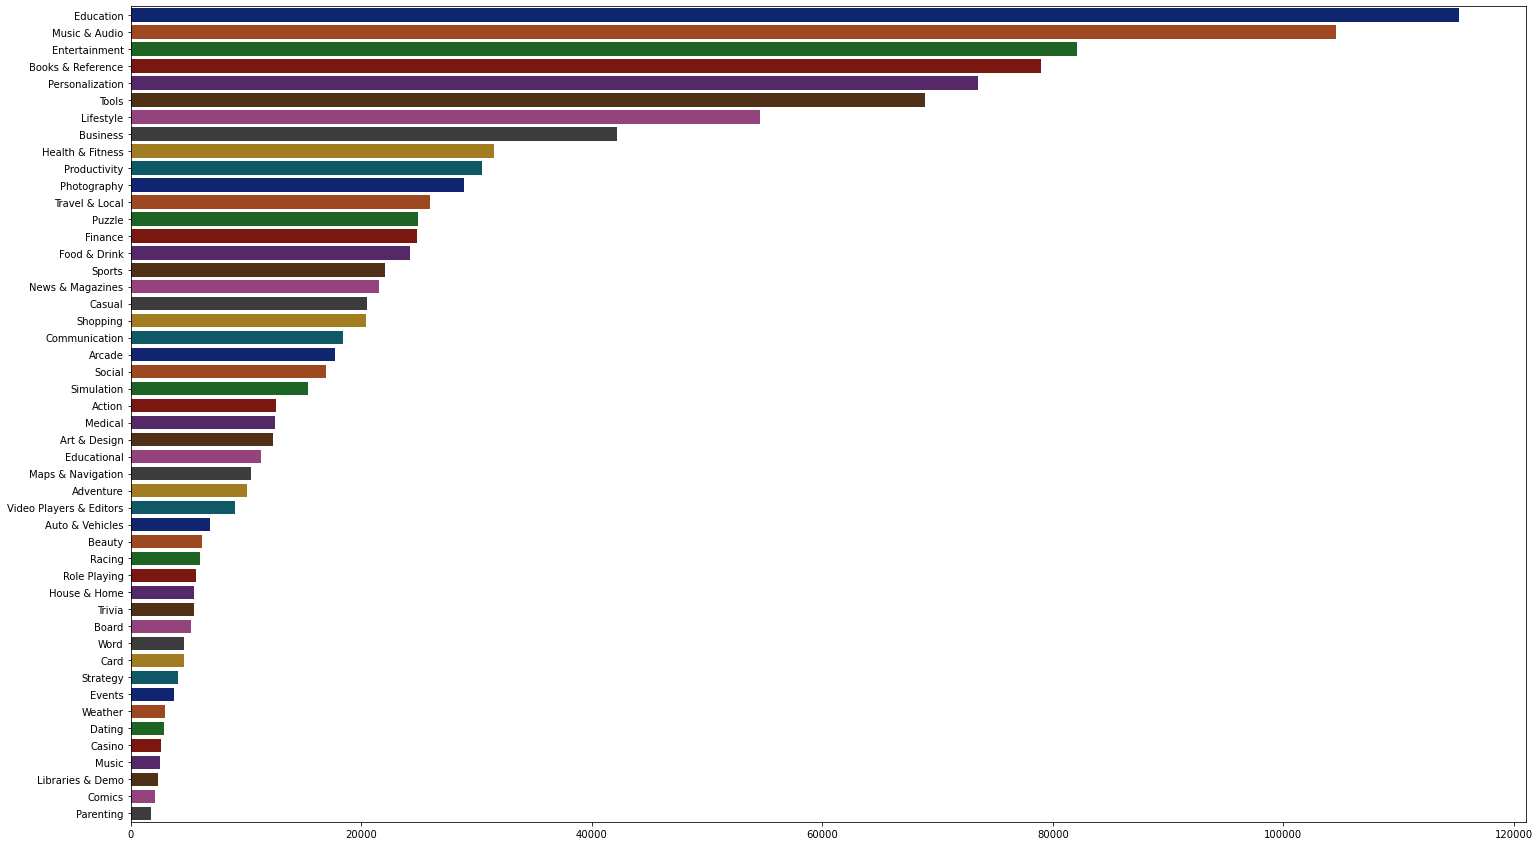

In [40]:
plt.figure(figsize=(25, 15))
genres = g_playstore["Category"].value_counts()
ax = sns.barplot(x=genres.values, y=genres.index, palette="dark")

In [41]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=g_playstore)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
plt.title('Box Plot of Ratings by Category',fontdict={'fontsize':40})

Text(0.5, 1.0, 'Box Plot of Ratings by Category')

In [42]:
g_playstore["Rating"].value_counts()

0.000000    433265
4.200000     53072
4.400000     52815
4.300000     50928
4.500000     47129
4.600000     46051
4.100000     42762
4.000000     40589
4.700000     35208
5.000000     33487
3.900000     33301
3.800000     31853
4.800000     29950
3.700000     24926
3.600000     20384
4.900000     18053
3.500000     17644
3.400000     15733
3.300000     12231
3.200000     11684
3.000000      8958
3.100000      8334
2.490334      6850
2.800000      6233
2.900000      6007
2.700000      4661
2.600000      4573
2.500000      3352
2.400000      2926
2.300000      2683
2.200000      2483
2.100000      1850
2.000000      1843
1.800000      1489
1.900000      1222
1.700000       879
1.600000       773
1.500000       544
1.400000       468
1.000000       356
1.300000       270
1.200000       227
1.100000        90
Name: Rating, dtype: int64

In [43]:
print("Minimum number of prices: %.2f" %g_playstore["Price"].min())
print("Maximum number of prices: %.2f" %g_playstore["Price"].max())

Minimum number of prices: 0.00
Maximum number of prices: 400.00


Text(1.0, 1.0, 'Price Vs Rating')

<Figure size 1440x720 with 0 Axes>

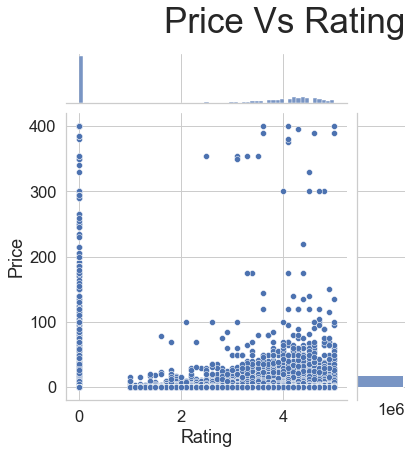

In [44]:
plt.figure(figsize=(20,10))
sns.jointplot(x=g_playstore['Rating'],y=g_playstore['Price'],kind='scatter')
plt.title('Price Vs Rating',fontdict={'fontsize':35},loc='right',pad=80)

No handles with labels found to put in legend.


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

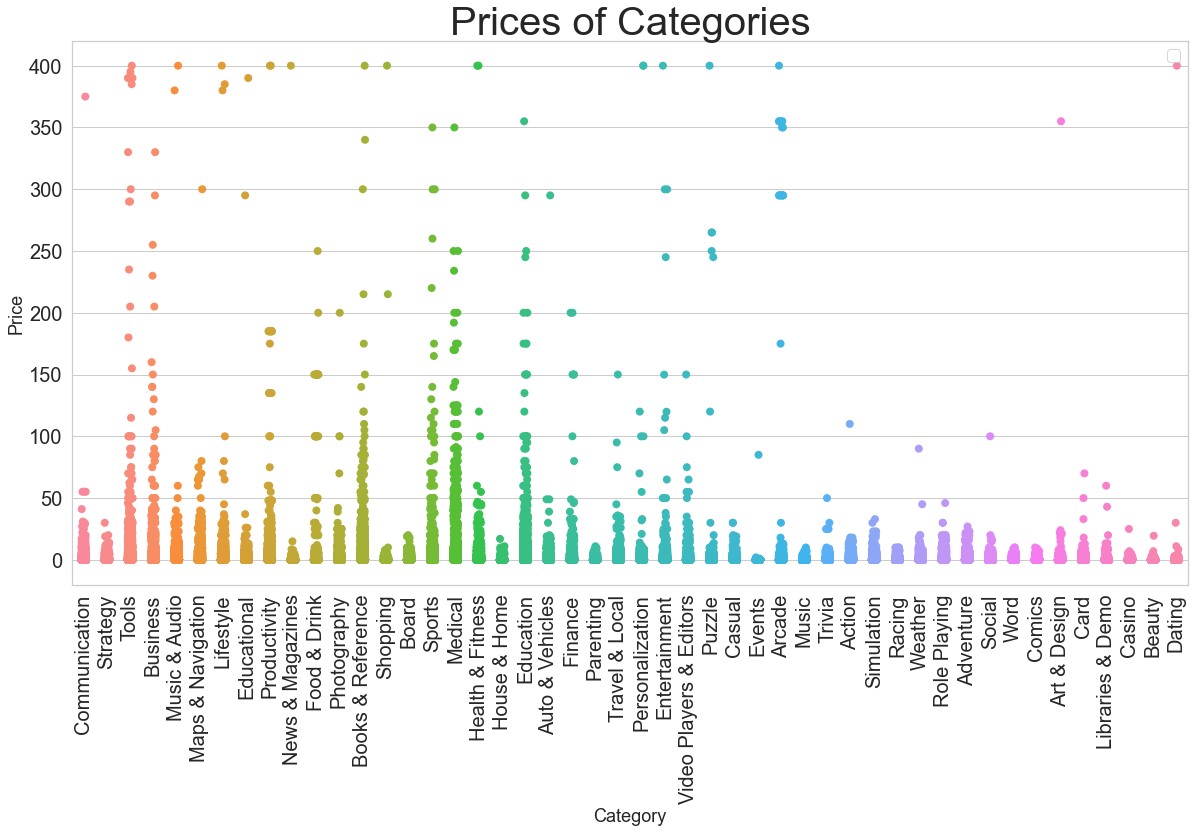

In [45]:
plt.figure(figsize=(20,10))
sns.stripplot(x=g_playstore['Category'],y=g_playstore['Price'],jitter=True,size=8)
plt.xticks(rotation=90)
plt.legend()
plt.title('Prices of Categories',fontdict={'fontsize':40})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Text(0.5, 1.0, 'Plot of Ratings by Category')

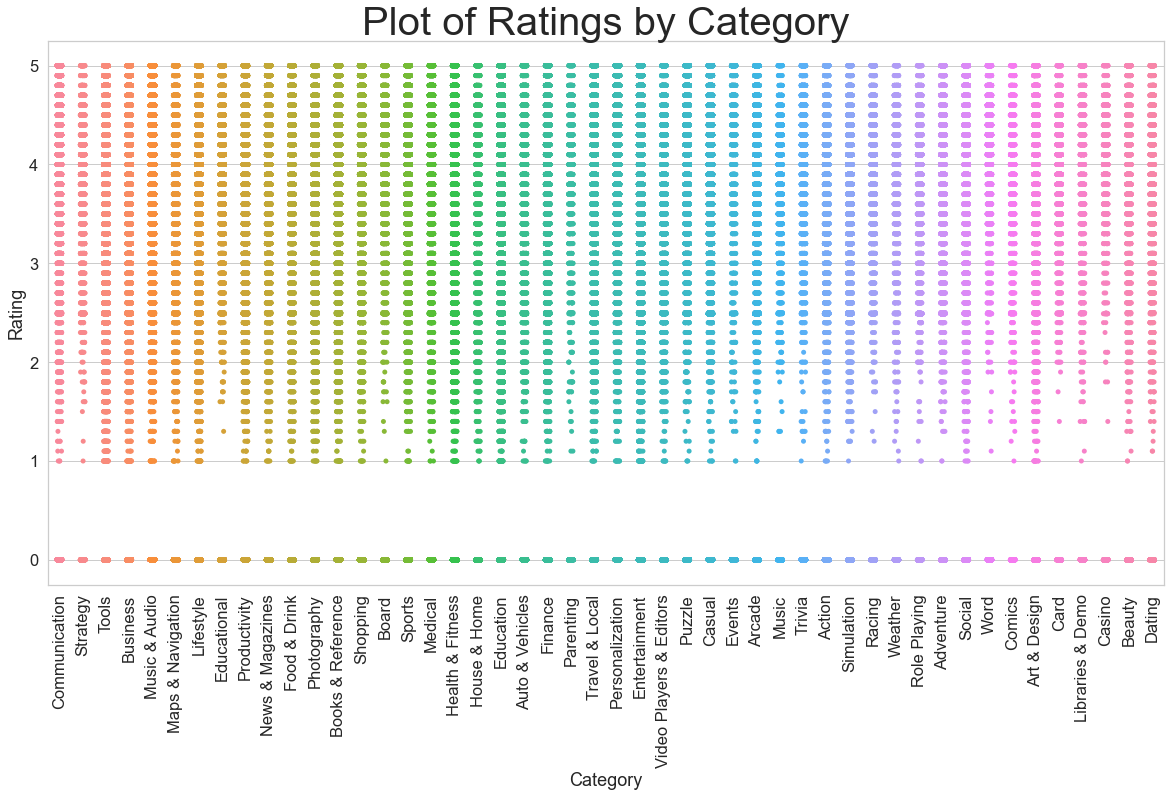

In [46]:
plt.figure(figsize=(20,10))
sns.stripplot(x=g_playstore['Category'],y=g_playstore['Rating'],jitter=True)
plt.xticks(rotation=90)
plt.title('Plot of Ratings by Category',fontdict={'fontsize':40})

In [47]:
grp = g_playstore.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Installs'].agg(np.mean)
print(x)
print(y)
print(z)

Category
Action                     3.182572
Adventure                  3.109772
Arcade                     2.761345
Art & Design               1.934613
Auto & Vehicles            2.278206
Beauty                     1.701874
Board                      3.146344
Books & Reference          2.598715
Business                   1.706922
Card                       3.412622
Casino                     3.519779
Casual                     2.901375
Comics                     2.980759
Communication              2.481588
Dating                     2.735450
Education                  2.464221
Educational                2.780001
Entertainment              2.445419
Events                     1.297659
Finance                    2.694753
Food & Drink               1.489409
Health & Fitness           2.090735
House & Home               1.554479
Libraries & Demo           2.509155
Lifestyle                  2.369156
Maps & Navigation          2.541866
Medical                    2.184560
Music              

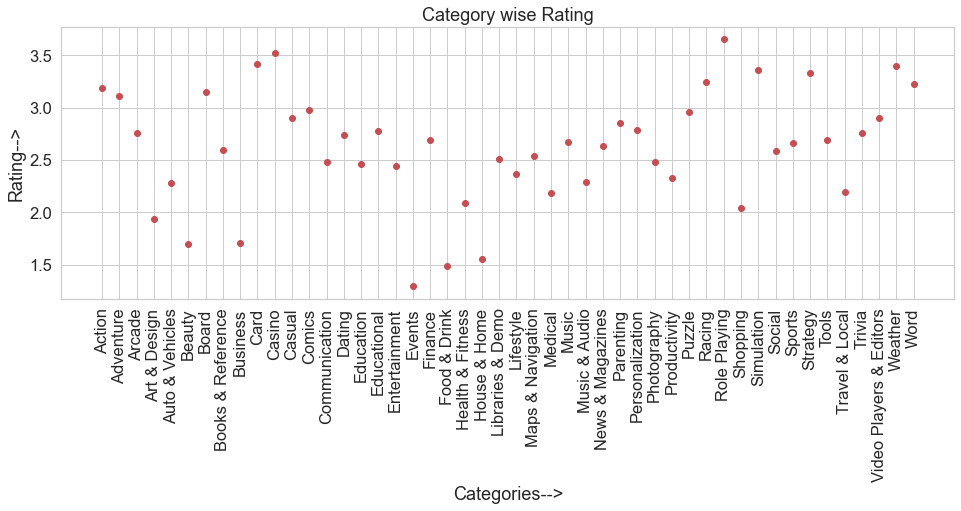

In [48]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

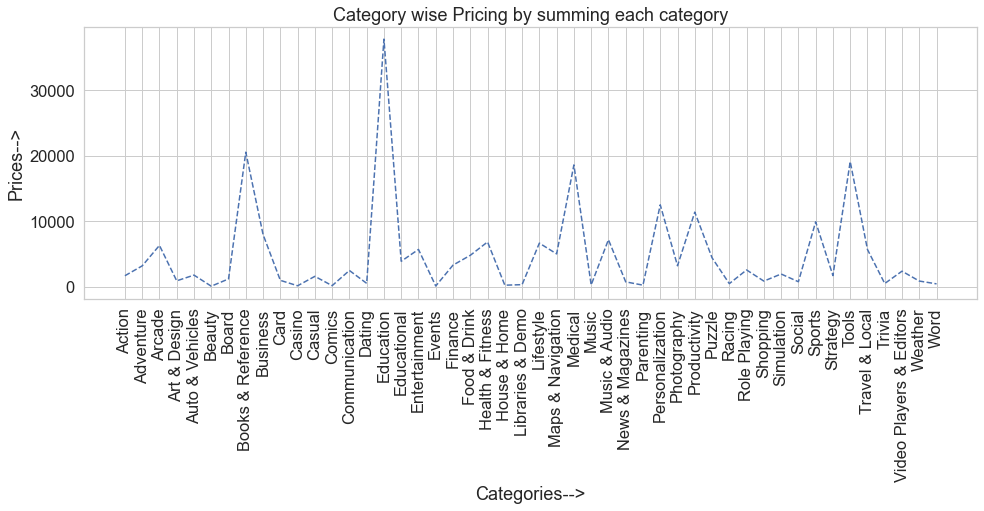

In [49]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing by summing each category')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

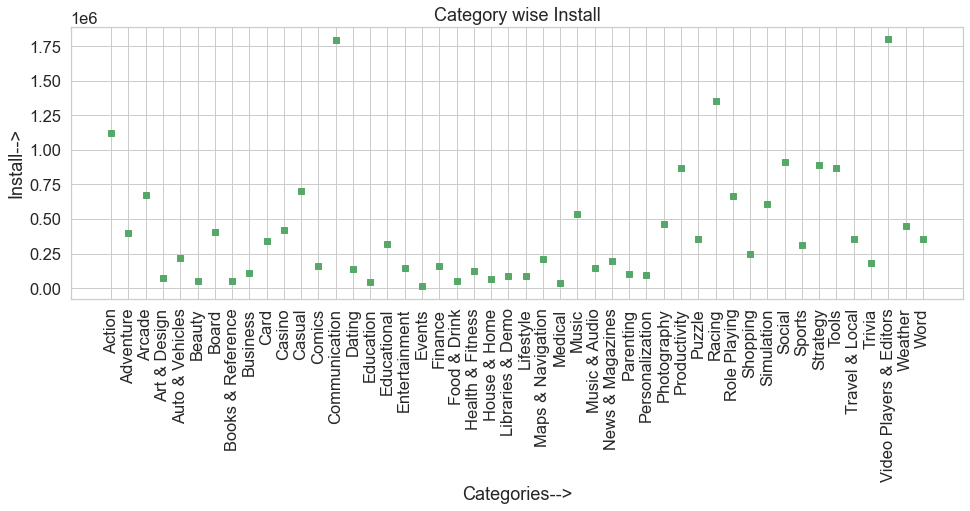

In [50]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Install')
plt.xlabel('Categories-->')
plt.ylabel('Install-->')
plt.show()

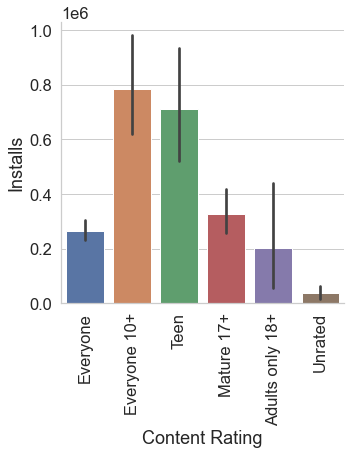

In [51]:
sns.catplot(x='Content Rating', y='Installs', data=g_playstore,kind='bar');
plt.xticks(rotation=90);

In [52]:
g_playstore["Content Rating"].value_counts()

Everyone           968246
Teen                99775
Mature 17+          31965
Everyone 10+        18030
Unrated                66
Adults only 18+        54
Name: Content Rating, dtype: int64

In [53]:
g_playstore.corr()

Rating  Rating Count  Installs  Minimum Installs  \
Rating            1.000000      0.016634  0.012691          0.012691   
Rating Count      0.016634      1.000000  0.513596          0.513596   
Installs          0.012691      0.513596  1.000000          1.000000   
Minimum Installs  0.012691      0.513596  1.000000          1.000000   
Maximum Installs  0.014900      0.559131  0.946757          0.946757   
Free              0.034702      0.003416  0.003116          0.003116   
Price            -0.017593     -0.000969 -0.000873         -0.000873   
Ad Supported      0.095514      0.002382 -0.001397         -0.001397   
In App Purchases  0.185266      0.032492  0.014917          0.014917   
Editors Choice    0.023253      0.150277  0.055936          0.055936   

                  Maximum Installs      Free     Price  Ad Supported  \
Rating                    0.014900  0.034702 -0.017593      0.095514   
Rating Count              0.559131  0.003416 -0.000969      0.002382   
Installs                  0.946757  0.003116 -0.000873     -0.001397   
Minimum Installs          0.946757  0.003116 -0.000873     -0.001397   
Maximum Installs          1.000000  0.003653 -0.001021     -0.001396   
Free                      0.003653  1.000000 -0.277081      0.255407   
Price                    -0.001021 -0.277081  1.000000     -0.070690   
Ad Supported             -0.001396  0.255407 -0.070690      1.000000   
In App Purchases          0.018039  0.030195 -0.009259      0.082388   
Editors Choice            0.066960 -0.000292 -0.000384      0.000178   

                  In App Purchases  Editors Choice  
Rating                    0.185266        0.023253  
Rating Count              0.032492        0.150277  
Installs                  0.014917        0.055936  
Minimum Installs          0.014917        0.055936  
Maximum Installs          0.018039        0.066960  
Free                      0.030195       -0.000292  
Price                    -0.009259       -0.000384  
Ad Supported              0.082388        0.000178  
In App Purchases          1.000000        0.057378  
Editors Choice            0.057378        1.000000

Text(0.5, 1.0, 'HeatMAP of Numericals')

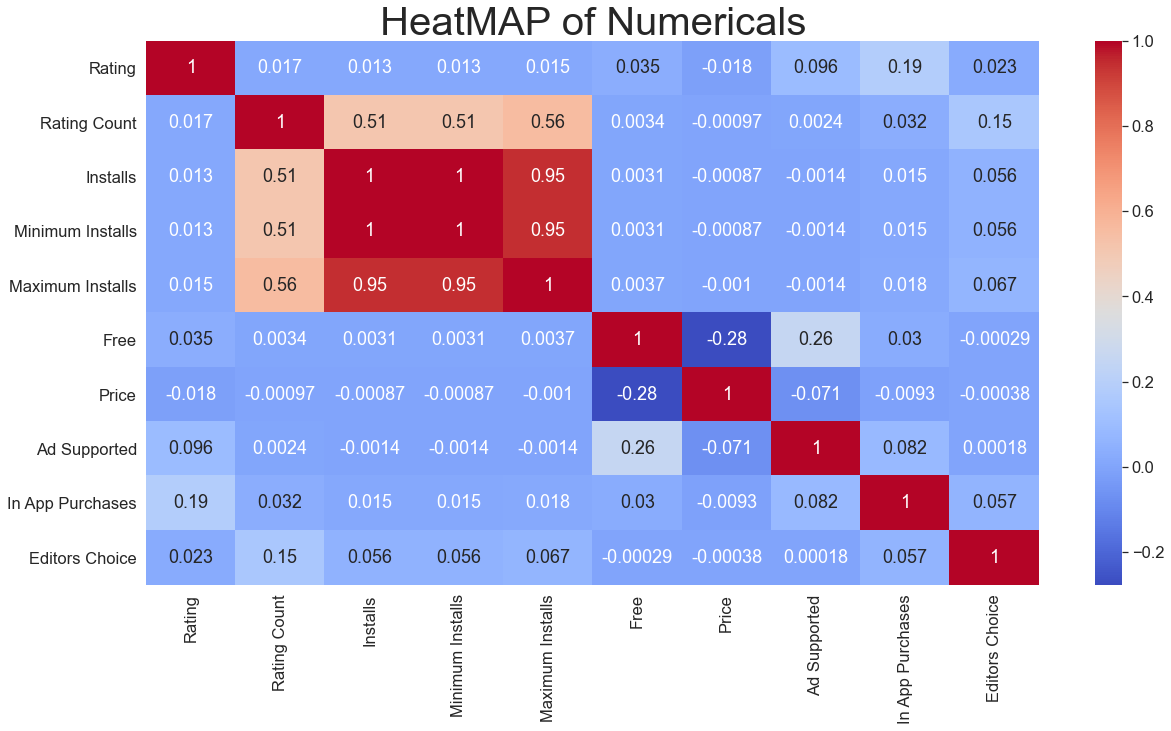

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(g_playstore.corr(),cmap='coolwarm',annot=True)
plt.title('HeatMAP of Numericals',fontdict={'fontsize':40})

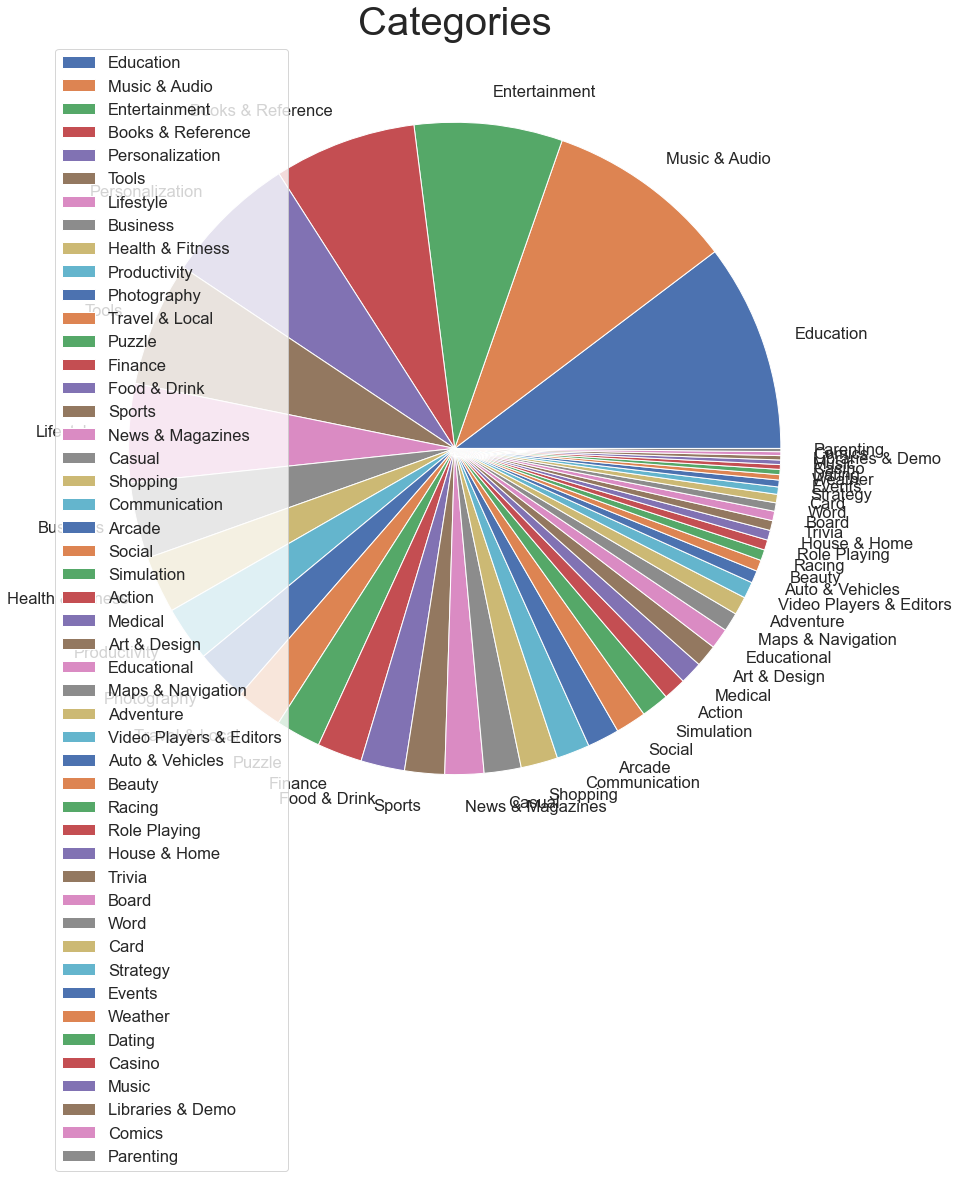

In [55]:
plt.figure(figsize=(15,15))
axes= g_playstore['Category'].value_counts().plot(kind='pie')
plt.title('Categories',fontdict= {'fontsize':40})
plt.ylabel('')
plt.legend()

In [56]:
top_installed_apps=g_playstore.sort_values(by="Installs", ascending= False)
top_installed_apps.head(10)

App Name                                   App Id  \
11491        Google Play services                   com.google.android.gms   
220926         WhatsApp Messenger                             com.whatsapp   
221599          Google Play Music                 com.google.android.music   
220961                   Facebook                      com.facebook.katana   
39          Google Text-to-Speech                   com.google.android.tts   
220807                      Gmail                    com.google.android.gm   
221618               Google Drive             com.google.android.apps.docs   
220806  Maps - Navigate & Explore             com.google.android.apps.maps   
220810                     Google  com.google.android.googlequicksearchbox   
220811                    YouTube               com.google.android.youtube   

                       Category  Rating  Rating Count      Installs  \
11491                     Tools     4.2    32425599.0  1.000000e+10   
220926            Communication     4.3   125380770.0  5.000000e+09   
221599            Music & Audio     3.4     5434994.0  5.000000e+09   
220961                   Social     4.1   105279686.0  5.000000e+09   
39                        Tools     4.3     2292232.0  5.000000e+09   
220807            Communication     4.4     8164590.0  5.000000e+09   
221618             Productivity     4.3     6809671.0  5.000000e+09   
220806           Travel & Local     4.1    12451778.0  5.000000e+09   
220810                    Tools     4.2    17237577.0  5.000000e+09   
220811  Video Players & Editors     4.1    88579975.0  5.000000e+09   

        Minimum Installs  Maximum Installs  Free  Price  ...   Developer Id  \
11491       1.000000e+10       10772700105  True    0.0  ...     Google LLC   
220926      5.000000e+09        5769032709  True    0.0  ...  WhatsApp Inc.   
221599      5.000000e+09        6471273083  True    0.0  ...     Google LLC   
220961      5.000000e+09        6180750358  True    0.0  ...       Facebook   
39          5.000000e+09        7769956479  True    0.0  ...     Google LLC   
220807      5.000000e+09        7599203833  True    0.0  ...     Google LLC   
221618      5.000000e+09        6268278970  True    0.0  ...     Google LLC   
220806      5.000000e+09        7991928686  True    0.0  ...     Google LLC   
220810      5.000000e+09        8008951294  True    0.0  ...     Google LLC   
220811      5.000000e+09        8571451598  True    0.0  ...     Google LLC   

                                        Developer Website  \
11491   https://developers.google.com/android/google-p...   
220926                           http://www.whatsapp.com/   
221599                      http://play.google.com/music/   
220961                  https://www.facebook.com/facebook   
39                                 http://www.google.com/   
220807  http://support.google.com/mail/bin/topic.py?hl...   
221618  https://support.google.com/drive/?p=android_dr...   
220806                      http://maps.google.com/about/   
220810               https://www.google.com/search/about/   
220811  https://support.google.com/youtube/topic/24225...   

                     Developer Email      Released  Last Updated  \
11491           apps-help@google.com  May 24, 2012  Nov 19, 2020   
220926  android@support.whatsapp.com  Oct 18, 2010  Nov 13, 2020   
221599          apps-help@google.com   May 5, 2011  Nov 04, 2020   
220961        android-support@fb.com  Oct 13, 2020  Nov 19, 2020   
39           tts-feedback@google.com  Oct 10, 2013  Oct 15, 2020   
220807          apps-help@google.com  Sep 21, 2010  Nov 23, 2020   
221618          apps-help@google.com  Apr 27, 2011  Nov 18, 2020   
220806          apps-help@google.com  Oct 13, 2020  Nov 19, 2020   
220810          apps-help@google.com  Aug 12, 2010  Nov 27, 2020   
220811  ytandroid-support@google.com  Oct 20, 2010  Nov 25, 2020   

       Content Rating                           Privacy Policy Ad Supported  \
11491        E

In [57]:
top_installed_apps = g_playstore
top_installed_apps = top_installed_apps.sort_values(by="Installs",ascending=False)
top_installed_apps.reset_index(inplace=True)
top_installed_apps.drop(["index"],axis=1,inplace=True)
top_installed_apps.loc[:40,['App Name','Installs','Content Rating','Developer Id','Category','Released']]

App Name      Installs  \
0                                Google Play services  1.000000e+10   
1                                  WhatsApp Messenger  5.000000e+09   
2                                   Google Play Music  5.000000e+09   
3                                            Facebook  5.000000e+09   
4                               Google Text-to-Speech  5.000000e+09   
5                                               Gmail  5.000000e+09   
6                                        Google Drive  5.000000e+09   
7                           Maps - Navigate & Explore  5.000000e+09   
8                                              Google  5.000000e+09   
9                                             YouTube  5.000000e+09   
10                       Google Chrome: Fast & Secure  5.000000e+09   
11                        Android Accessibility Suite  5.000000e+09   
12            Google TV (previously Play Movies & TV)  5.000000e+09   
13                           Samsung Internet Browser  1.000000e+09   
14                                        Device Care  1.000000e+09   
15                               Samsung Push Service  1.000000e+09   
16  Microsoft Word: Write, Edit & Share Docs on th...  1.000000e+09   
17                                     Samsung Health  1.000000e+09   
18                                        Cloud Print  1.000000e+09   
19  Microsoft Excel: View, Edit, & Create Spreadsh...  1.000000e+09   
20  Dropbox: Cloud Storage to Backup, Sync, File S...  1.000000e+09   
21                             Samsung Voice Recorder  1.000000e+09   
22                                           Snapchat  1.000000e+09   
23                                           Briefing  1.000000e+09   
24                      Skype - free IM & video calls  1.000000e+09   
25                                   Samsung My Files  1.000000e+09   
26              Google Duo - High Quality Video Calls  1.000000e+09   
27                                      Samsung Email  1.000000e+09   
28      Android Auto - Google Maps, Media & Messaging  1.000000e+09   
29                       Samsung Print Service Plugin  1.000000e+09   
30                                 Google Street View  1.000000e+09   
31                                   Candy Crush Saga  1.000000e+09   
32                                 Microsoft OneDrive  1.000000e+09   
33                                     Subway Surfers  1.000000e+09   
34                                             TikTok  1.000000e+09   
35                                           Currents  1.000000e+09   
36                                  Google Play Games  1.000000e+09   
37                             Android System WebView  1.000000e+09   
38  Google Play Books - Ebooks, Audiobooks, and Co...  1.000000e+09   
39                         Samsung Experience Service  1.000000e+09   
40  Microsoft PowerPoint: Slideshows and Presentat...  1.000000e+09   

   Content Rating                    Developer Id                 Category  \
0        Everyone                      Google LLC                    Tools   
1        Everyone                   WhatsApp Inc.            Communication   
2            Teen                      Google LLC            Music & Audio   
3            Teen                        Facebook                   Social   
4        Everyone                      Google LLC                    Tools   
5        Everyone                      Google LLC            Communication   
6        Everyone                      Google LLC             Productivity   
7        Everyone                      Google LLC           Travel & Local   
8        Everyone                      Google LLC                    Tools   
9            Teen                      Google LLC  Video Players & Editors   
10       Everyone                      Google LLC            Communication   
11       Everyone                      Google LLC                    Tools   
12           Teen                      Google LL

In [58]:
top_installed_and_ratingc_apps = g_playstore.sort_values(by=["Installs", "Rating Count"], ascending=False)
top_installed_and_ratingc_apps

App Name                         App Id  \
11491            Google Play services         com.google.android.gms   
220926             WhatsApp Messenger                   com.whatsapp   
220961                       Facebook            com.facebook.katana   
220811                        YouTube     com.google.android.youtube   
221597   Google Chrome: Fast & Secure             com.android.chrome   
...                               ...                            ...   
1117872            Hamburgeria Valley       com.appmybusiness.Valley   
1117873                    Al Rustico    com.appmybusiness.AlRustico   
1117874                  Girasole SRL  com.appmybusiness.GirasoleSRL   
1117905       TNN - Tech News Network          tnn.tech.news.network   
1118113                 Basir Telecom               com.BasirTelecom   

                        Category  Rating  Rating Count      Installs  \
11491                      Tools     4.2    32425599.0  1.000000e+10   
220926             Communication     4.3   125380770.0  5.000000e+09   
220961                    Social     4.1   105279686.0  5.000000e+09   
220811   Video Players & Editors     4.1    88579975.0  5.000000e+09   
221597             Communication     4.2    26444937.0  5.000000e+09   
...                          ...     ...           ...           ...   
1117872             Food & Drink     0.0           0.0  0.000000e+00   
1117873             Food & Drink     0.0           0.0  0.000000e+00   
1117874                   Beauty     0.0           0.0  0.000000e+00   
1117905         News & Magazines     0.0           0.0  0.000000e+00   
1118113            Communication     0.0           0.0  0.000000e+00   

         Minimum Installs  Maximum Installs  Free  Price  ...  \
11491        1.000000e+10       10772700105  True    0.0  ...   
220926       5.000000e+09        5769032709  True    0.0  ...   
220961       5.000000e+09        6180750358  True    0.0  ...   
220811       5.000000e+09        8571451598  True    0.0  ...   
221597       5.000000e+09        7692260405  True    0.0  ...   
...                   ...               ...   ...    ...  ...   
1117872      0.000000e+00                 0  True    0.0  ...   
1117873      0.000000e+00                 0  True    0.0  ...   
1117874      0.000000e+00                 0  True    0.0  ...   
1117905      0.000000e+00                 0  True    0.0  ...   
1118113      0.000000e+00                 0  True    0.0  ...   

            Developer Id                                  Developer Website  \
11491         Google LLC  https://developers.google.com/android/google-p...   
220926     WhatsApp Inc.                           http://www.whatsapp.com/   
220961          Facebook                  https://www.facebook.com/facebook   
220811        Google LLC  https://support.google.com/youtube/topic/24225...   
221597        Google LLC               http://www.google.com/chrome/android   
...                  ...                                                ...   
1117872   AppMyBusiness.                          http://www.subsplash.com/   
1117873   AppMyBusiness.                      https://www.appmybusiness.eu/   
1117874   AppMyBusiness.                      https://www.appmybusiness.eu/   
1117905  NIVA GAMES APPS  https://nivagamesapps.blogspot.com/p/tnn-tech-...   
1118113    newTel Dialer                        http://www.newteldialer.com   

                      Developer Email      Released  Last Updated  \
11491            apps-help@google.com  May 24, 2012  Nov 19, 2020   
220926   android@support.whatsapp.com  Oct 18, 2010  Nov 13, 2020   
220961         android-support@fb.com  Oct 13, 2020  Nov 19, 2020   
220811   ytandroid-support@google.com  Oct 20, 2010  Nov 25, 2020   
221597           apps-help@google.com   Feb 7, 2012  Nov 18, 2020   
...                               ...           ...           ...   
1117872          dev@appmybusiness.eu  Nov 30, 2020  Nov 30, 2020   
1117873          

In [59]:
top_installed_apps_rcount = g_playstore
top_installed_apps_rcount = top_installed_apps_rcount.sort_values(by=["Installs","Rating Count"],ascending=False)
top_installed_apps_rcount.reset_index(inplace=True)
top_installed_apps_rcount.drop(["index"],axis=1,inplace=True)
top_installed_apps_rcount.loc[:40,['App Name','Installs','Rating Count','Content Rating','Developer Id','Category','Released']]

App Name      Installs  \
0                                Google Play services  1.000000e+10   
1                                  WhatsApp Messenger  5.000000e+09   
2                                            Facebook  5.000000e+09   
3                                             YouTube  5.000000e+09   
4                        Google Chrome: Fast & Secure  5.000000e+09   
5                                              Google  5.000000e+09   
6                           Maps - Navigate & Explore  5.000000e+09   
7                                               Gmail  5.000000e+09   
8                                        Google Drive  5.000000e+09   
9                                   Google Play Music  5.000000e+09   
10                        Android Accessibility Suite  5.000000e+09   
11                              Google Text-to-Speech  5.000000e+09   
12            Google TV (previously Play Movies & TV)  5.000000e+09   
13                                          Instagram  1.000000e+09   
14           Messenger – Text and Video Chat for Free  1.000000e+09   
15                                     Subway Surfers  1.000000e+09   
16                                      Google Photos  1.000000e+09   
17                                   Candy Crush Saga  1.000000e+09   
18                                             TikTok  1.000000e+09   
19                                           Snapchat  1.000000e+09   
20                                            Twitter  1.000000e+09   
21                                      Facebook Lite  1.000000e+09   
22                         SHAREit - Transfer & Share  1.000000e+09   
23                                  Google Play Games  1.000000e+09   
24                      Skype - free IM & video calls  1.000000e+09   
25                                            Netflix  1.000000e+09   
26                       Gboard - the Google Keyboard  1.000000e+09   
27              Google Duo - High Quality Video Calls  1.000000e+09   
28                                           Currents  1.000000e+09   
29  Microsoft Word: Write, Edit & Share Docs on th...  1.000000e+09   
30                                           Hangouts  1.000000e+09   
31                             Android System WebView  1.000000e+09   
32                                           Messages  1.000000e+09   
33  Microsoft Excel: View, Edit, & Create Spreadsh...  1.000000e+09   
34                           Samsung Internet Browser  1.000000e+09   
35                                    Samsung Gallery  1.000000e+09   
36                                 Google Street View  1.000000e+09   
37  Dropbox: Cloud Storage to Backup, Sync, File S...  1.000000e+09   
38                                 Microsoft OneDrive  1.000000e+09   
39  Google Play Books - Ebooks, Audiobooks, and Co...  1.000000e+09   
40  Microsoft PowerPoint: Slideshows and Presentat...  1.000000e+09   

    Rating Count Content Rating                       Developer Id  \
0     32425599.0       Everyone                         Google LLC   
1    125380770.0       Everyone                      WhatsApp Inc.   
2    105279686.0           Teen                           Facebook   
3     88579975.0           Teen                         Google LLC   
4     26444937.0       Everyone                         Google LLC   
5     17237577.0       Everyone                         Google LLC   
6     12451778.0       Everyone                         Google LLC   
7      8164590.0       Everyone                         Google LLC   
8      6809671.0       Everyone                         Google LLC   
9      5434994.0           Teen                         Google LLC   
10     2345955.0       Everyone                         Google LLC   
11     2292232.0       Everyone                         Google LLC   
12     1626062.0           Teen                         Google LLC   
13   109593315.0           Teen                          Instagram   
14    754189

In [60]:
app1=top_installed_apps.head(100)
app1["Content Rating"].value_counts().plot.pie()
plt.title("Content Rating - Top 100 (Main) Apps")
plt.legend()
plt.show()

In [61]:
def plot_bar(x, y):
    data = [go.Bar(x=x, y=y)]
    iplot(data)
    
def plot_pie(values, labels):
    data = [go.Pie(values=values, labels=labels)]
    iplot(data)

# What categories should Developers target?

In [62]:
category_count = dict(g_playstore.Category.value_counts())

In [63]:
plot_bar(list(category_count.keys()), list(category_count.values()))

In [64]:
plot_pie(labels=list(category_count.keys()), values=list(category_count.values()))

# Wordcloud

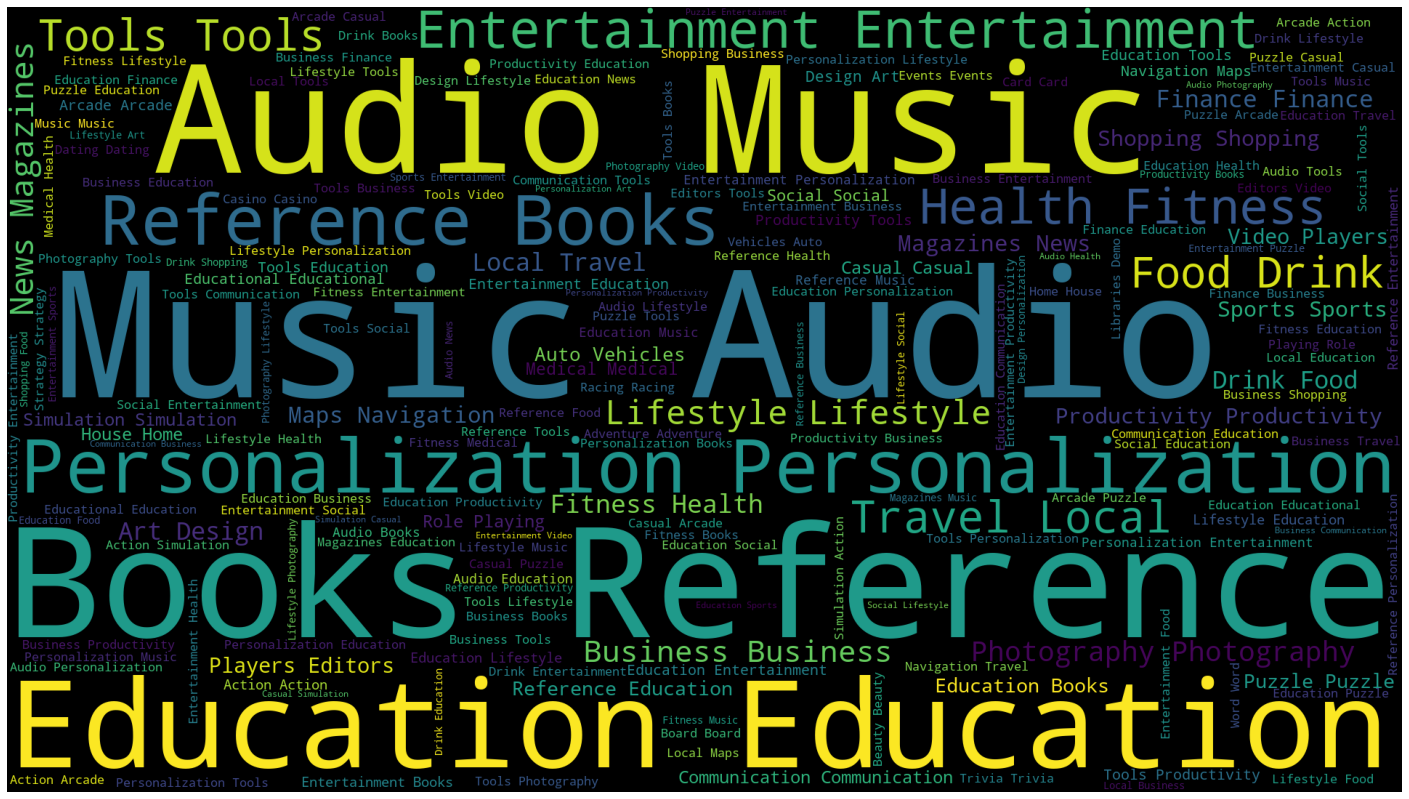

In [65]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(g_playstore.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

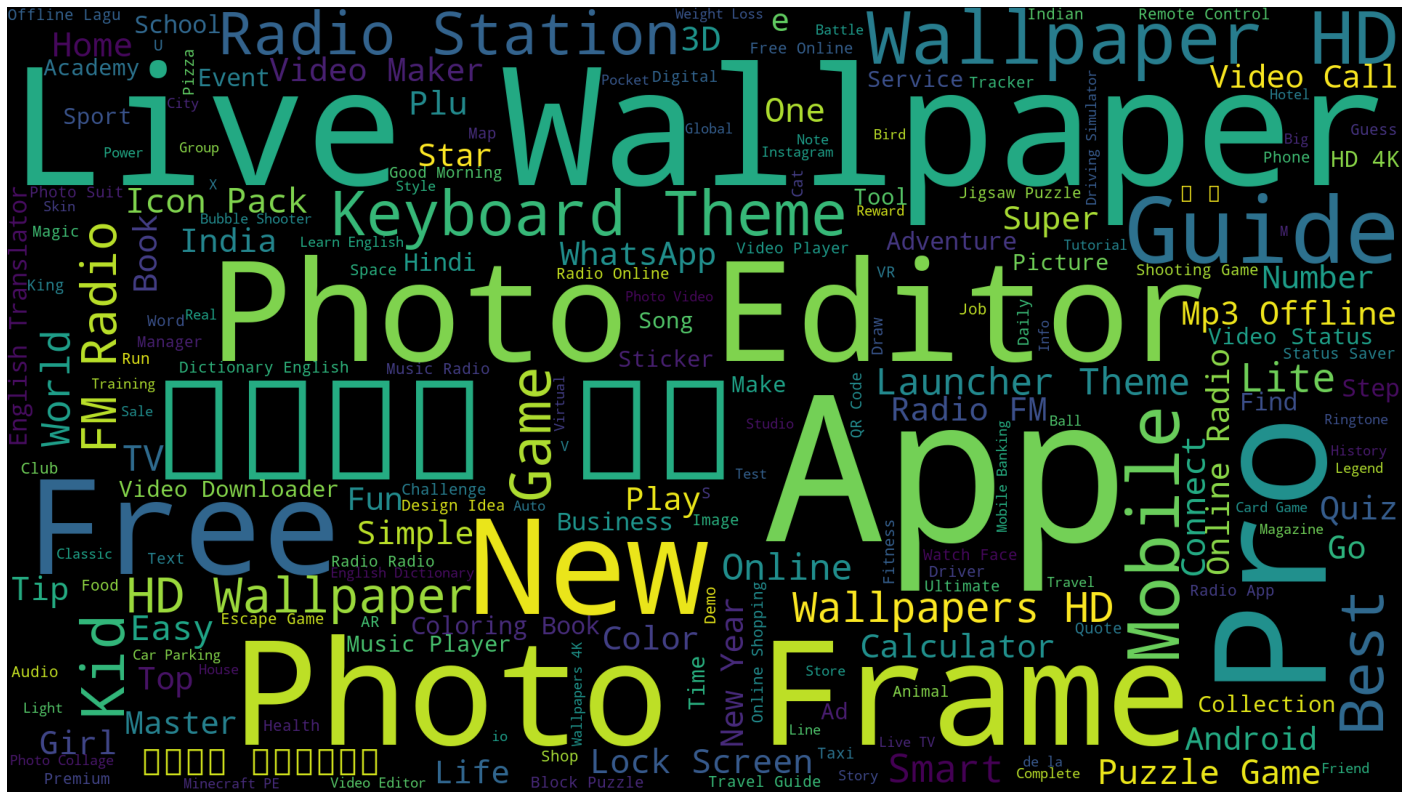

In [66]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(g_playstore['App Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Conclusion

In [67]:
#Minimun Andrid Version for mostly apps is 4.1 & above
#Education & Audio & video contains most apps
#Maximum Apps been rated as 4.2
#Maximum price of the App is 400 USD
#Maximum Rating Category Apps is from Racing
#Maximum Pricing Category Apps is from Education
#Maximum Installing Category Apps is from Communication & Video Player
#Maximum contents are everyone type
#Google Play Services is the ranked first in downloading app
#WhatsApp is having highest Rating Count by users
#Top 10 Mostly apps is from Google Developer
#Mostly Apps are free
#A Developer should target categories which have high demand but lack of quality apps like Entertainment and Music & Auidio

Future Scope
We can find clustering , KNN, Logistic Regression, decision tree etc